# Artificial Intelligence for Trading (Lab Lecture 3)
**Contacts: novella@di.uniroma1.it, coletta@di.uniroma1.it, prata@di.uniroma1.it**

## Recap of previous Lab Lecture

You have seen examples of data from real stock market dataset (e.g., https://finance.yahoo.com).

In particular, **you studied <"Open" "High" "Low" "Close"> data format, namely OHLC format**.
They will look like the picture below (**AAPL.csv**).

<img src="data/press_images/AAPL_table.png" width="600" height="700"/>
<br>
They have usually have limit granularity (1 day in the picture above), for more accurate data, other kind of data source and structure are often used.

## Fundamental vs Techinical Analysis 

Trading firms use **Fundamental analysis** and **technical analysis** to forecast price trend of the stock in future. **Fundamental Analysis** exams the basic economic factors which drives commodities, stocks and bonds prices. 
**Technical Analysis** forecasts the price of a share according its the past performance statistics, assuming that the price of a share is mainly based on demand and supply forces operating in the stock market. 

<br> 
<br> 

<img src="data/press_images/tech_vs_fund.png" width="800" height="1100"/>

## Homework 1 - Bollinger Bands

A **Bollinger Band®** is a technical analysis tool defined by a set of **trendlines plotted two standard deviations (positively and negatively) away from a simple moving average (SMA)** of a security's price, but which can be adjusted to user preferences. Bollinger Bands® were developed and copyrighted by the famous technical trader John Bollinger, designed to  identify when an asset is oversold or overbought. Many traders believe the closer the prices move to the upper band, the more overbought the market is, and the closer the prices move to the lower band, the more oversold the market is <a href="https://www.investopedia.com/terms/b/bollingerbands.asp">[1]</a>.

**Task 1** consists in reading the whole APPL (Apple Inc.) dataset available in the _data_ directory, computing and plotting the Bollinger bands of the adjusted close price, moving average (20 days window size) and the adjusted close price itself. **Task 2** consists in identifying potential buying and selling opportunities and plotting vertical lines in the plot: green corresponding to buy signals, red to sell signals.

The output plot should look similar to this:
<img src="data/press_images/signals_by_boil.svg"/>

To implement Bollinger bands you may want to review the lecture of October 13: _rolling mean_, _rolling standard deviation_, _arrays operations and indexing_, _dataframe plotting_. The homework is due **by Friday October 23**. Should you need further clarifications or help, please feel free to contact us before the deadline.

Additional material:
- https://www.investopedia.com/terms/b/bollingerbands.asp
- https://www.bollingerbands.com/bollinger-band-rules
- https://www.iforex.in/bollinger-bands

### Technical Indicators

###### **Bollinger Band®** 

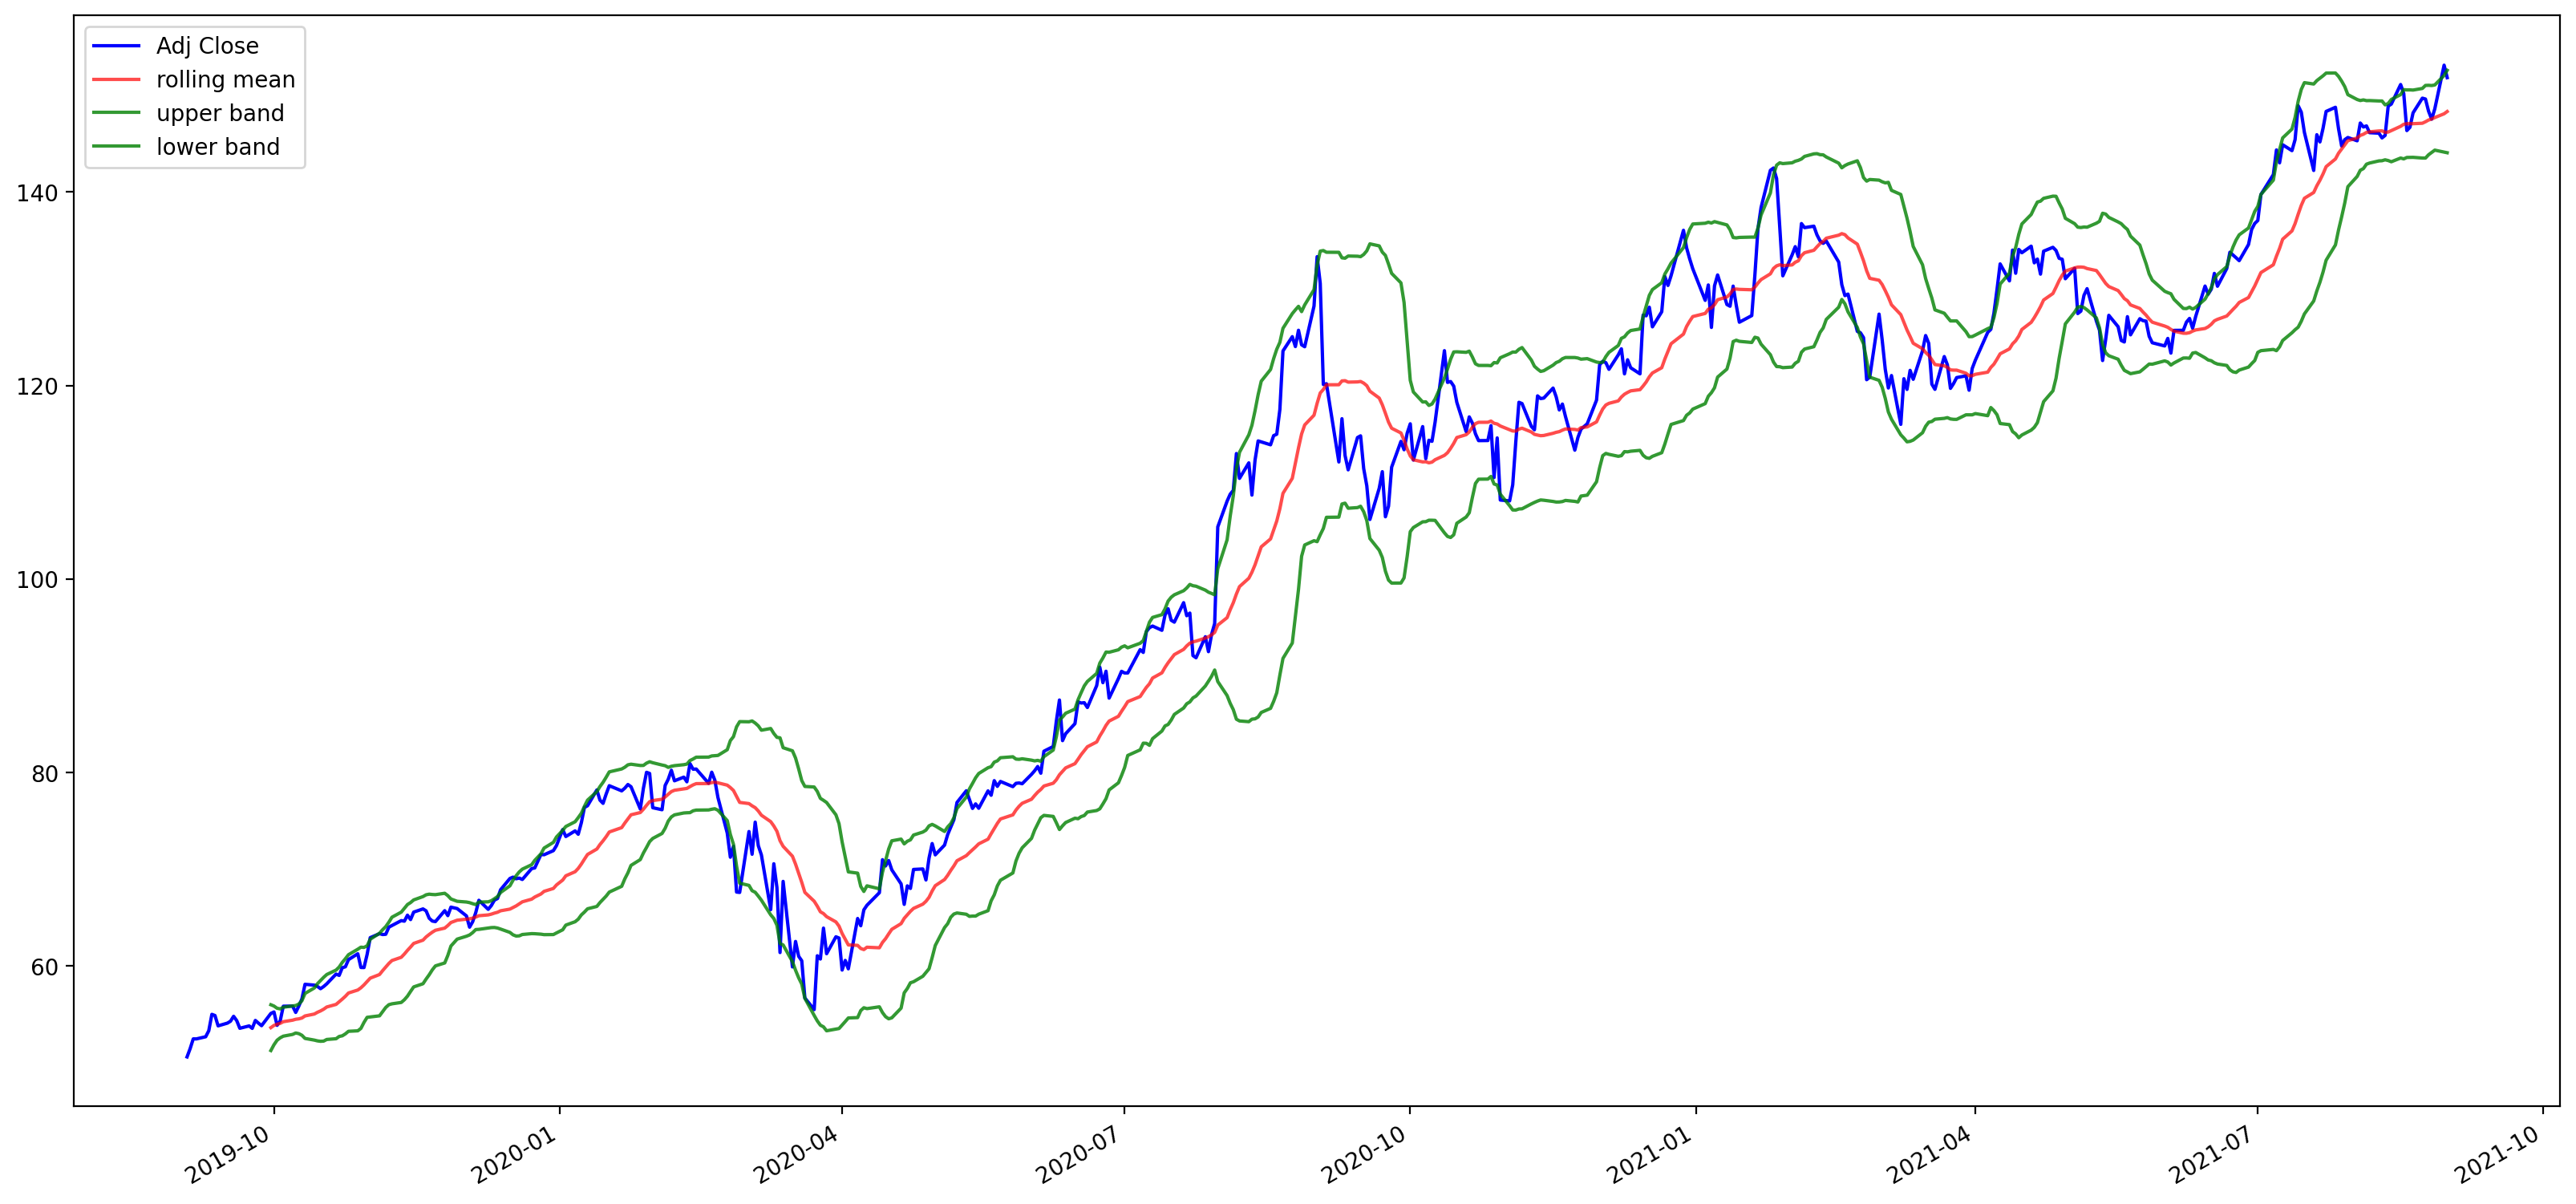

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rc('figure', figsize=(10,3), dpi=200)
warnings.filterwarnings("ignore")

aapl = pd.read_csv('./data/AAPL.csv')
adf_close = "Adj Close"
df = aapl[['Date', adf_close]]
df.date = pd.to_datetime(df.Date)

bb_window = 20

# mean
df['rm'] = df[adf_close].rolling(bb_window).mean()
# upper  band
df['ub'] = df.rm + 2*df[adf_close].rolling(bb_window).std()
# lower band
df['lb'] = df.rm - 2*df[adf_close].rolling(bb_window).std()


fig, ax = plt.subplots(figsize = (20, 10))
ax.plot(df.date, df[adf_close], color = 'b')
ax.plot(df.date, df.rm, color = 'r', alpha = 0.7)
ax.plot(df.date, df.ub, color = 'g', alpha = 0.8)
ax.plot(df.date, df.lb, color = 'g', alpha = 0.8)
ax.legend((adf_close, 'rolling mean', 'upper band', 'lower band'))

plt.gcf().autofmt_xdate()
plt.show()

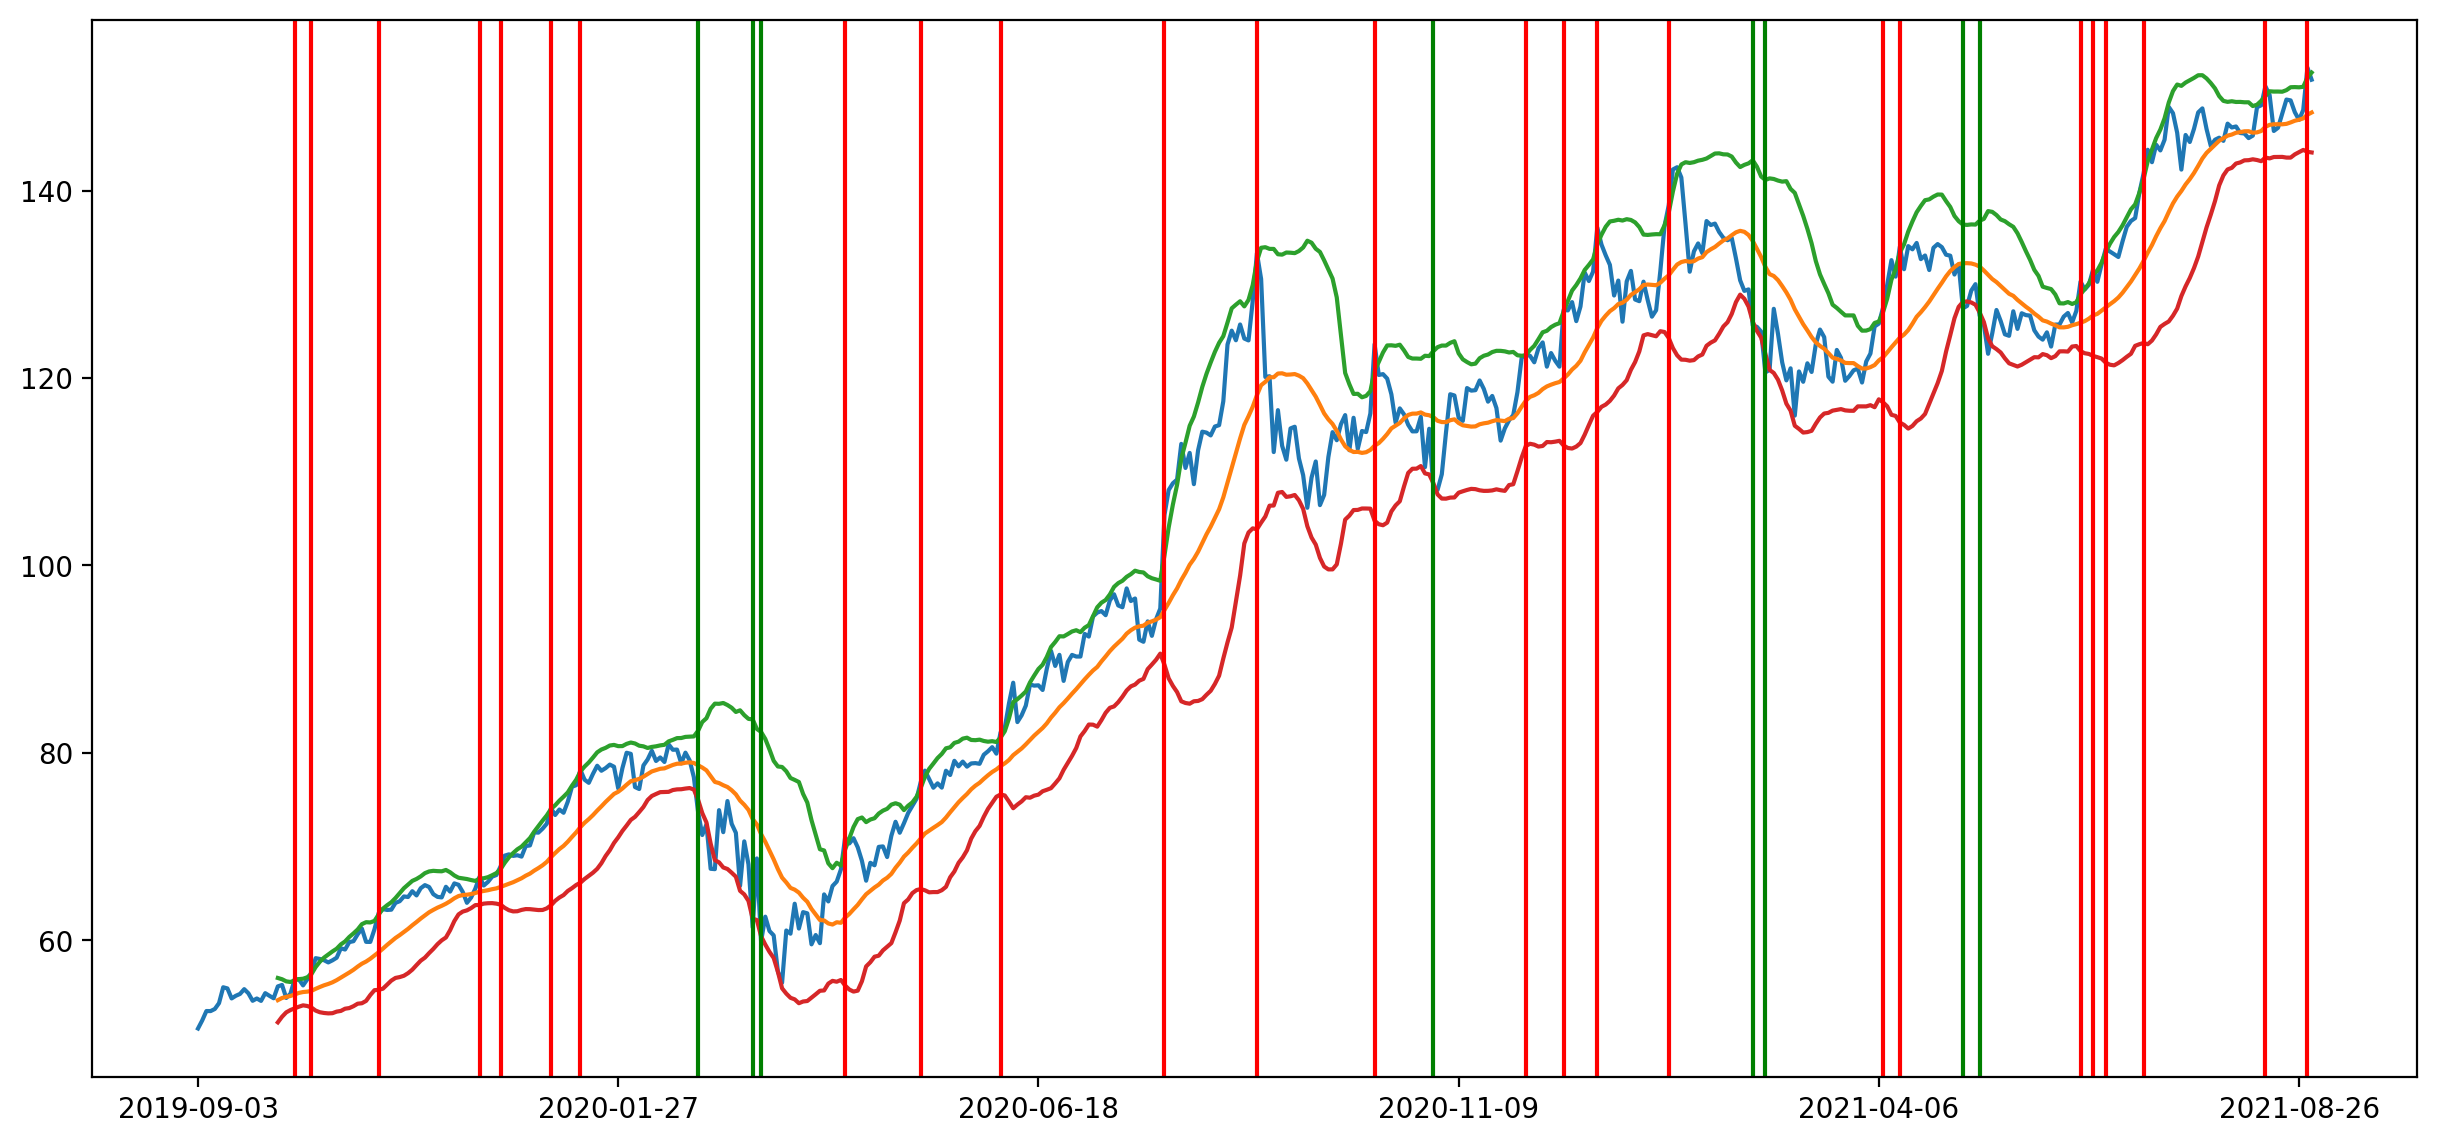

In [2]:
fig, ax = plt.subplots(figsize= (15,7))

ax.xaxis.set_major_locator(plt.MaxNLocator(6))

plt.plot(df['Date'], df['Adj Close'])
plt.plot(df['Date'], df.rm)
plt.plot(df['Date'], df.ub)
plt.plot(df['Date'], df.lb) 

up_adj, dw_adj = False,False
for (i,price,upper, lower) in zip(df['Date'], df['Adj Close'], df.ub, df.lb):
    if price >= upper:
        if not up_adj:
            ax.axvline(x= i, color='r', linestyle='-')
        up_adj = True
    else:
        up_adj = False
    if price <= lower:
        if not dw_adj:
            ax.axvline(x=i, color='g', linestyle='-')
        dw_adj = True
    else:
        dw_adj = False   

plt.show()

##### MACD
The **Moving Average Convergence Divergence** momentum indicator to identify buy or sell opportunities. It is based on the difference of a **short-term** and **long-term** price trend. MACD can be calculated very simply by subtracting the 26 period EMA from the 12 period **EMA**. The **MACD** chart commonly will include a signal line plotted on top of the MACD. Whenever the MACD crosses above the signal line it is a bullish signal, and a bearish signal when it falls below. 


##### EMA
The **EMA** is an **exponential moving average**, which is a sinmple moving average but it weights more recent data points. 

<img src="data/press_images/ema.png" width="800" height="1100"/>

A common choice for the **smoothing factor** is 2.


In [4]:
def calculate_ema(df, days, smoothing=2, column="Close"):
    data_col = df[column]
    # first let's compute the simple moving average for the first days
    ema = [np.mean(data_col[:days])]
    
    ema = [np.nan] * (days - 1) + ema 
    # iteratively compute the EMA for each subsequent day
    for price in data_col[days:]:
        ema.append((price * (smoothing / (1 + days))) + ema[-1] * (1 - (smoothing / (1 + days))))
    
    return ema

In [5]:
df = pd.read_csv("data/AAPL.csv")

df["EMA_10"] = calculate_ema(df, days=10)
print(df)

           Date        Open        High         Low       Close   Adj Close  \
0    2019-09-03   51.607498   51.744999   51.055000   51.424999   50.594364   
1    2019-09-04   52.097500   52.369999   51.830002   52.297501   51.452770   
2    2019-09-05   53.000000   53.492500   52.877499   53.320000   52.458759   
3    2019-09-06   53.512501   53.605000   53.127499   53.314999   52.453835   
4    2019-09-09   53.709999   54.110001   52.767502   53.542500   52.677662   
..          ...         ...         ...         ...         ...         ...   
499  2021-08-25  149.809998  150.320007  147.800003  148.360001  148.360001   
500  2021-08-26  148.350006  149.119995  147.509995  147.539993  147.539993   
501  2021-08-27  147.479996  148.750000  146.830002  148.600006  148.600006   
502  2021-08-30  149.000000  153.490005  148.610001  153.119995  153.119995   
503  2021-08-31  152.660004  152.800003  151.289993  151.830002  151.830002   

        Volume      EMA_10  
0     80092000        

<AxesSubplot:>

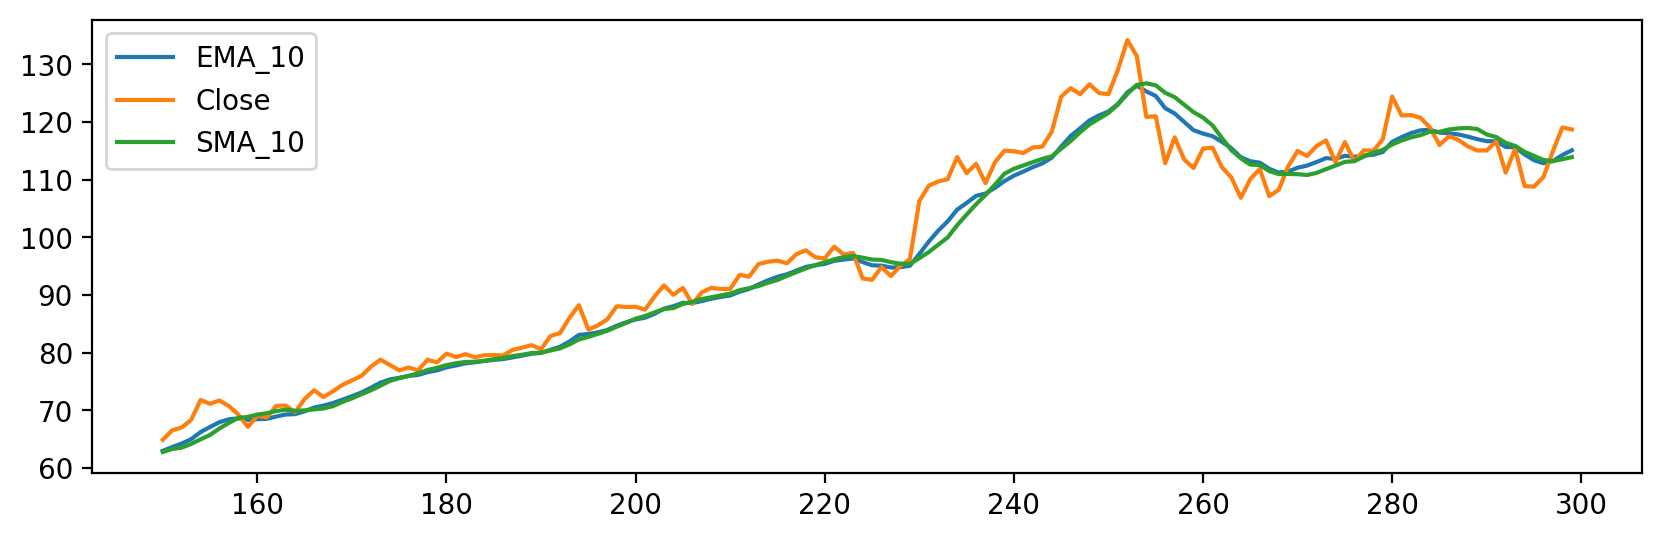

In [6]:
df["SMA_10"] = df["Close"].rolling(10).mean()
df[["EMA_10", "Close", "SMA_10"]][150:300].plot()

In [7]:
# faster way to compute EMA
df["EMA_10_new"] = df['Close'].ewm(span=10).mean()
print(df[["EMA_10_new", "EMA_10"]])

     EMA_10_new      EMA_10
0     51.424999         NaN
1     51.904875         NaN
2     52.473746         NaN
3     52.750901         NaN
4     52.978148         NaN
..          ...         ...
499  148.394040  148.394040
500  148.238759  148.238759
501  148.304440  148.304440
502  149.179996  149.179996
503  149.661815  149.661815

[504 rows x 2 columns]


##### MACD

MACD(12,26,9) is referred to:
<br>
MACD = 12-Period EMA − 26-Period EMA
<br>
Signal line = 9-Period SMA of MACD


In [8]:
def macd(df):
    df["EMA_12"] = df['Close'].ewm(span=12).mean()
    df["EMA_26"] = df['Close'].ewm(span=26).mean()
    df['MACD'] = df['EMA_12'] - df['EMA_26']
    df['Signal Line'] = df['MACD'].ewm(span=9).mean()


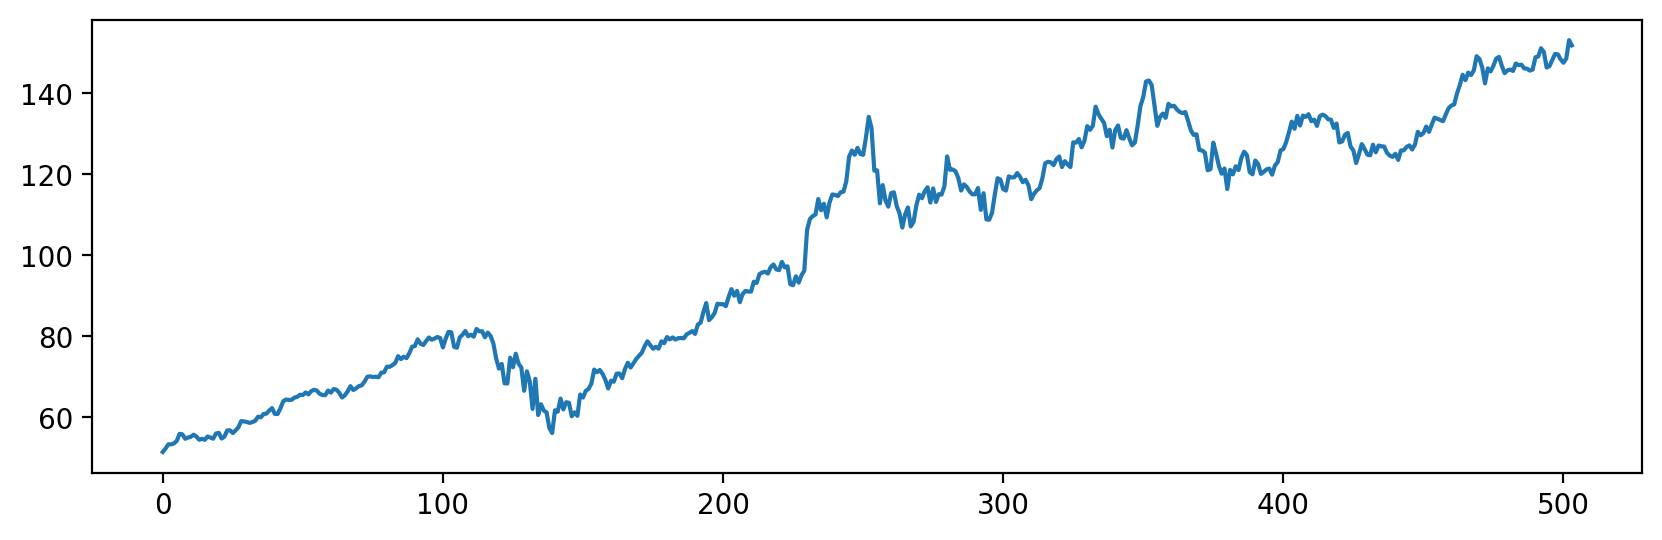

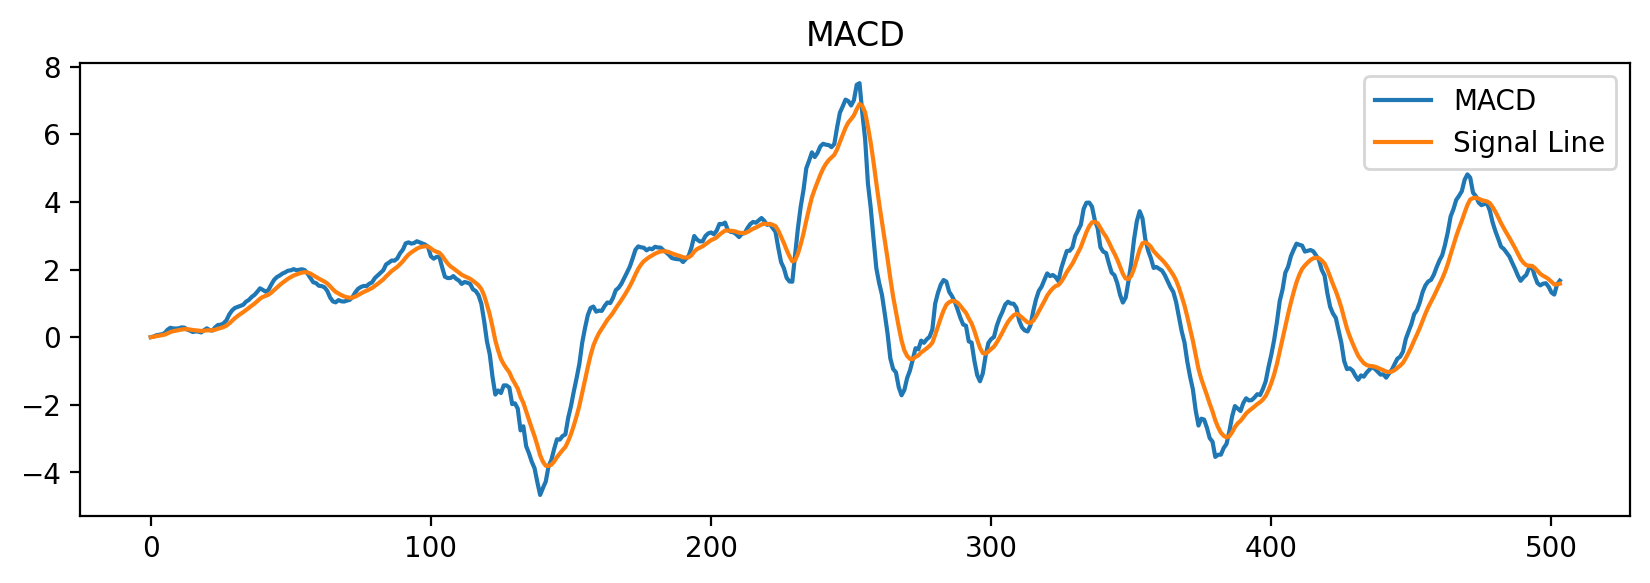

In [9]:
signal_df = df[["Close"]]
macd(signal_df)
df["Close"].plot()
plt.show()
signal_df[['MACD', "Signal Line"]].plot(title="MACD")
plt.show()

Whenever MACD crosses above the signal line it is a bullish signal, and a bearish signal when it falls below. 

#### RSI
The relative strength index (RSI) is a momentum indicator used in technical analysis that measures the magnitude of recent price changes, to evaluate overbought or oversold conditions in the price of a stock or other asset.
In details, it describes the current price relative to average high and low prices over a previous trading period.

<br>
It uses a standardization formula to ensure all values are placed on a scale of 0-100. An asset is usually considered overbought when the RSI is above 70% and oversold when it is below 30%.

<br>
<br>

It is computed using the Relative Strength (RS) of the current market, which considers the average gain or loss used in the calculation is the average percentage gain or loss during a look-back period. Usually a period of 14 days is used. 


<img src="data/press_images/rsi-formulae-alpharithms.jpg" width="600" height="800"/>

In [10]:
df["Diff"] = df['Close'].diff()  # gain and loss for each day, daily return 
df["Gain"] = np.where(df["Diff"] > 0, df["Diff"], 0)  # save all the days with a gain and its value
df["Loss"] = np.where(df["Diff"] < 0, -df["Diff"], 0)  # save all the days with a loss and its positive value

df[["Close", "Diff", "Gain", "Loss"]][30:50]

,Close,Diff,Gain,Loss
30,58.830002,-0.137497,0.000000,0.137497
31,58.592499,-0.237503,0.000000,0.237503
32,58.820000,0.227501,0.227501,0.000000
33,59.102501,0.282501,0.282501,0.000000
34,60.127499,1.024998,1.024998,0.000000
35,59.990002,-0.137497,0.000000,0.137497
36,60.794998,0.804996,0.804996,0.000000
37,60.895000,0.100002,0.100002,0.000000
38,61.645000,0.750000,0.750000,0.000000
39,62.262501,0.617501,0.617501,0.000000


In [11]:
# now compute the average of these loss and gain in the past
days = 14
df['Avg_gain'] = df['Gain'].rolling(days).mean() # rolling mean 14 of gains
df['Avg_loss'] = df['Loss'].rolling(days).mean() # //

# compute the RS
df["RS"] = df["Avg_gain"] / df["Avg_loss"]

# compute the RSI
df['RSI'] = 100 - (100/(1+df['RS']))

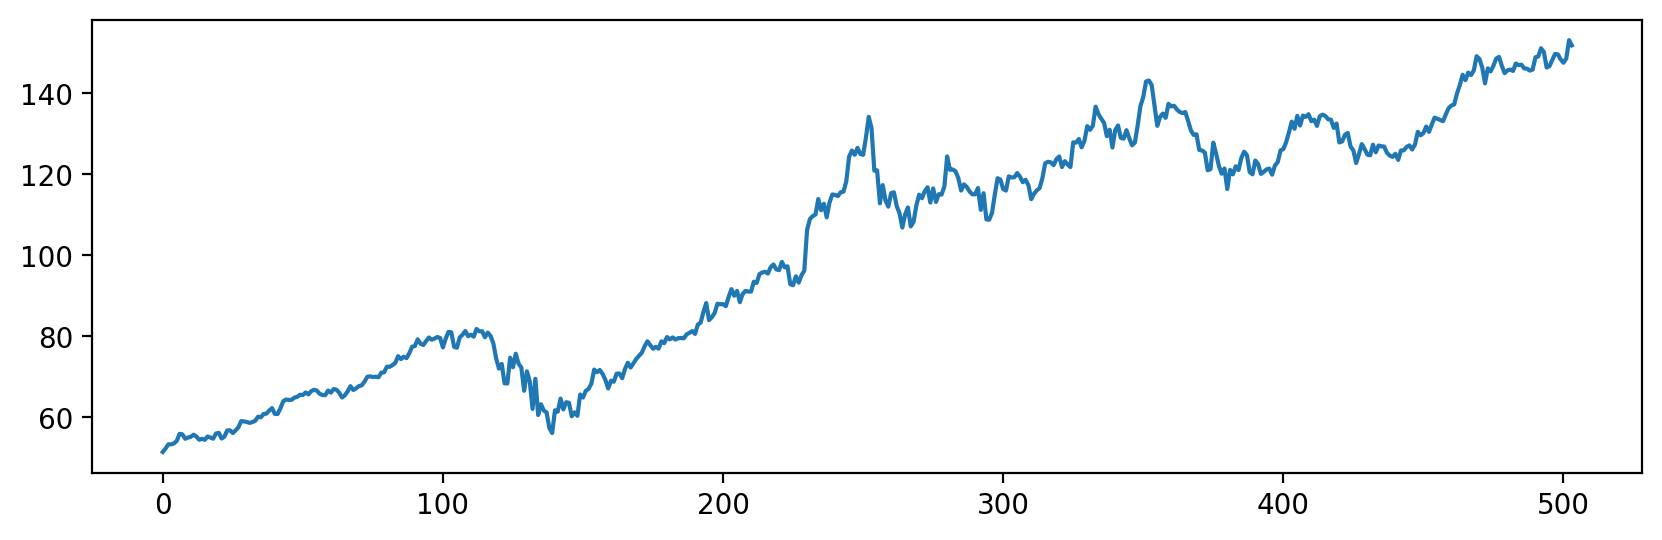

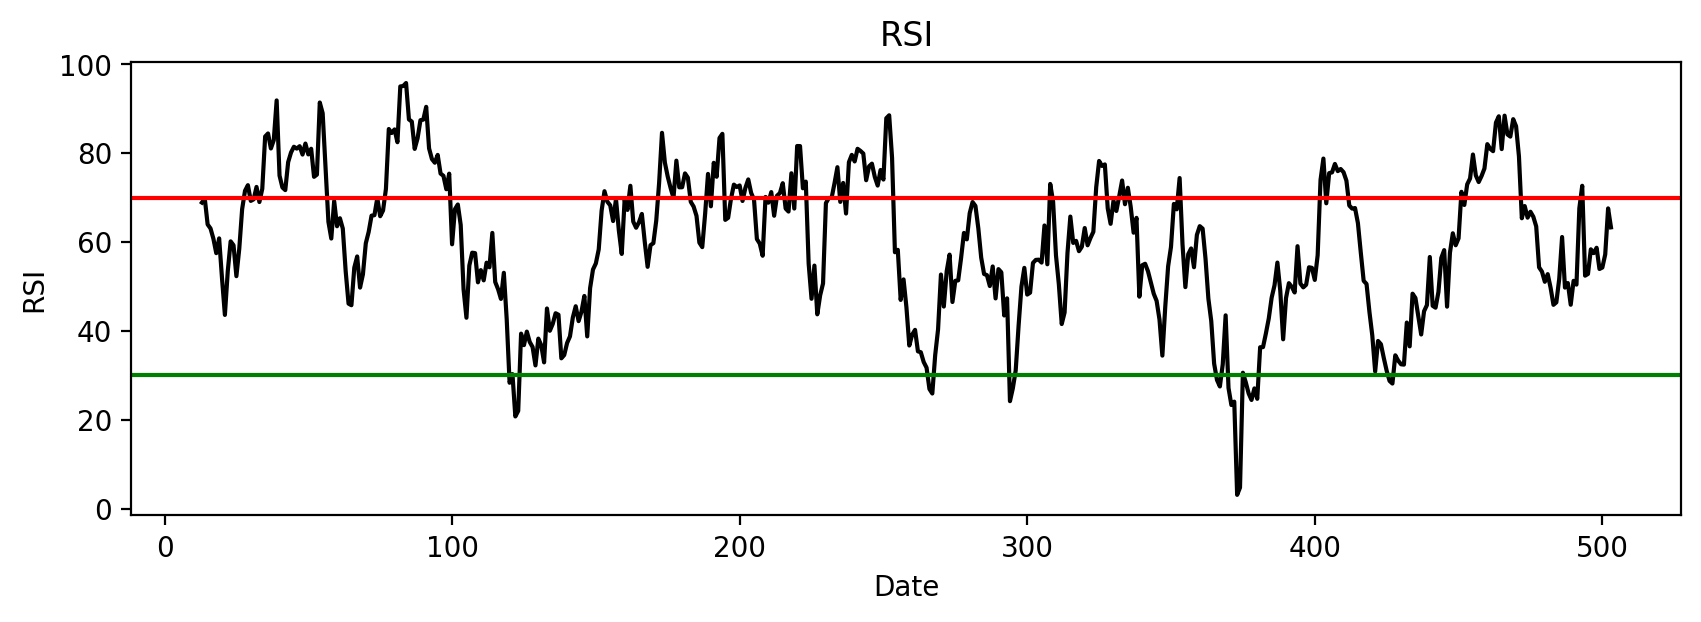

In [12]:
df["Close"].plot()
plt.show()
plt.figure(2)
ax = df['RSI'].plot(title="RSI", color="black")
ax.set_xlabel("Date")
ax.set_ylabel("RSI")
plt.axhline(y=30,color='green')
plt.axhline(y=70,color='red')

#### Python libraries to compute indicators

Pandas_ta - https://pypi.org/project/pandas-ta/

<AxesSubplot:>

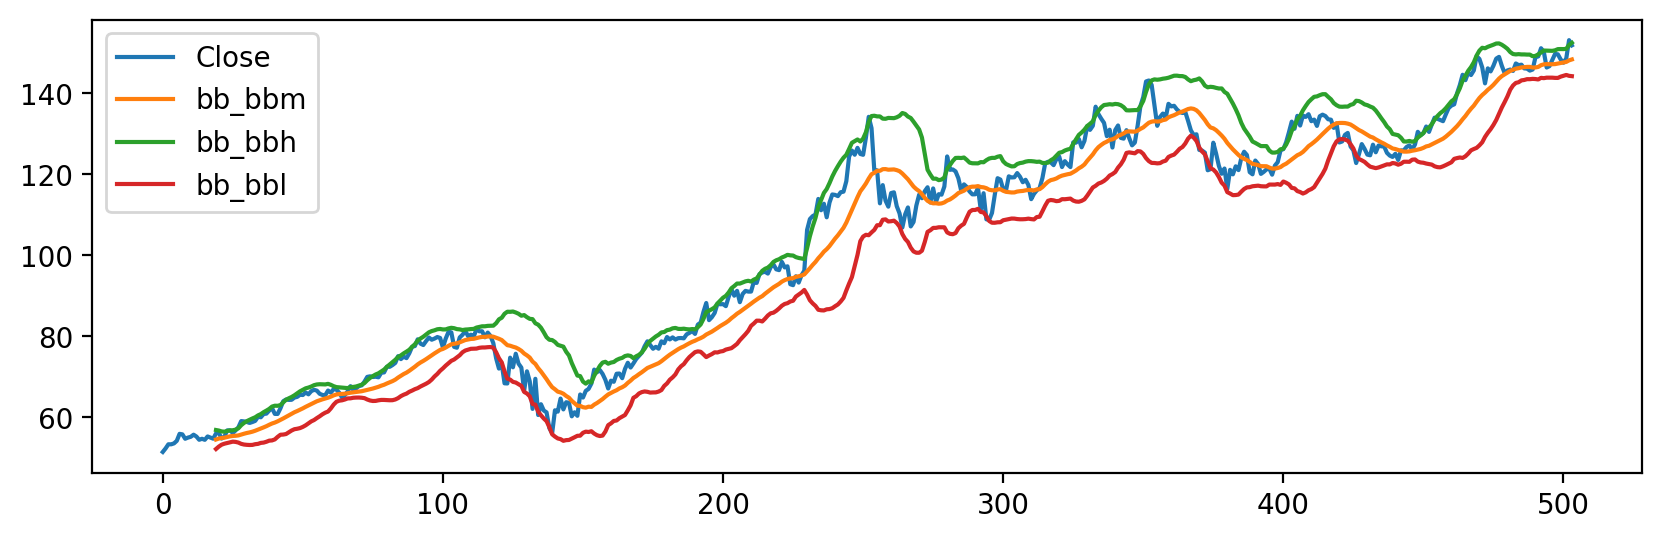

In [13]:

from ta.utils import dropna
from ta.volatility import BollingerBands

# Initialize Bollinger Bands Indicator
df = df[["Close"]]
indicator_bb = BollingerBands(close=df["Close"], window=20, window_dev=2)

# Add Bollinger Bands features
df['bb_bbm'] = indicator_bb.bollinger_mavg()
df['bb_bbh'] = indicator_bb.bollinger_hband()
df['bb_bbl'] = indicator_bb.bollinger_lband()

df.plot()

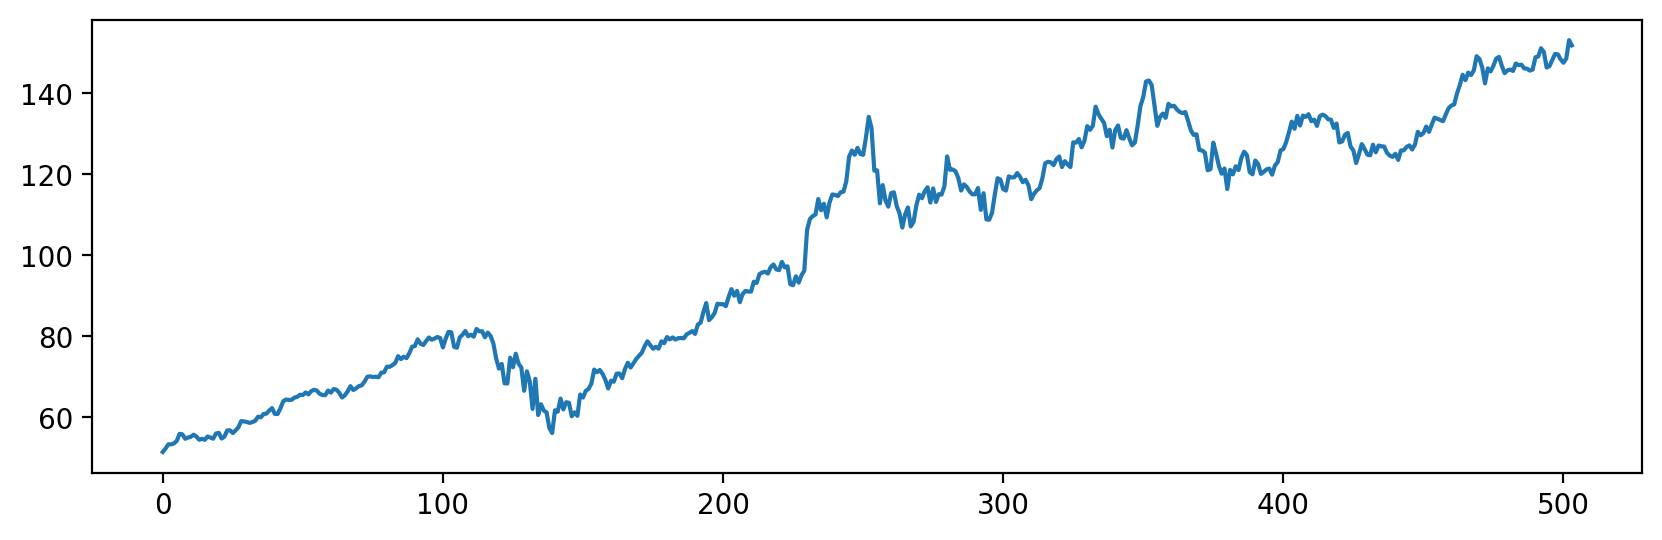

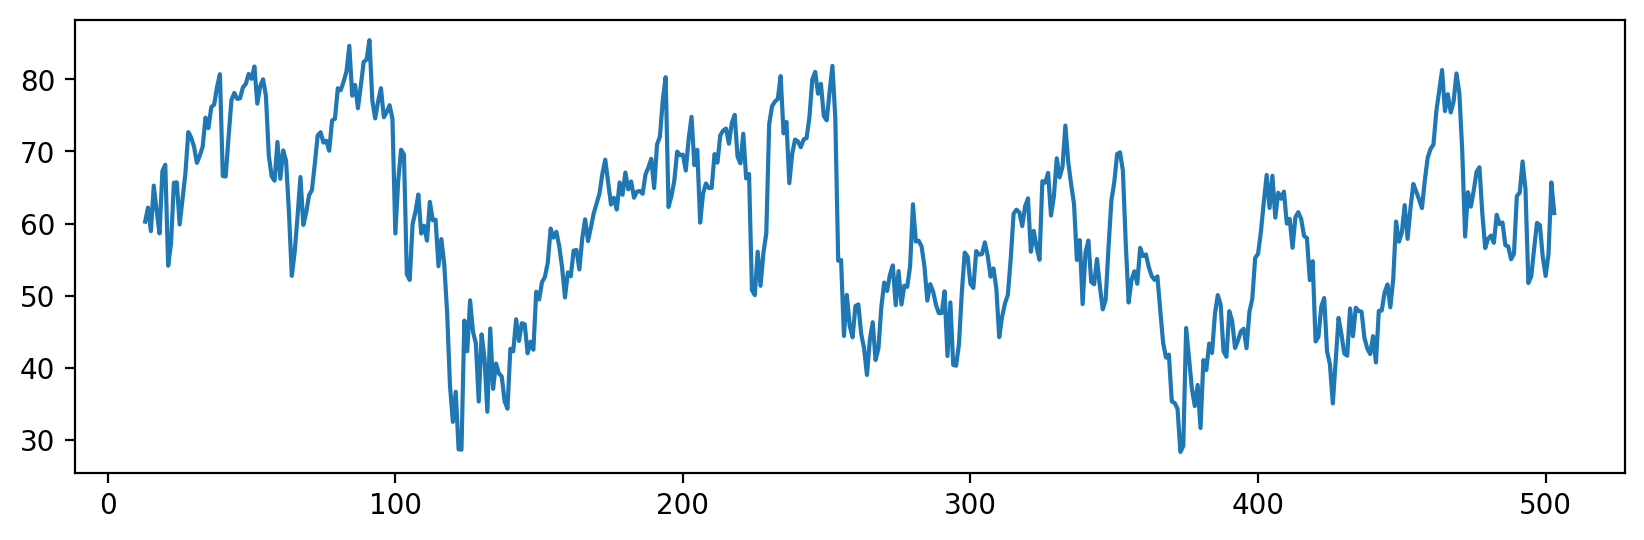

In [14]:
from ta.momentum import rsi

# Initialize Bollinger Bands Indicator
df = df[["Close"]]
rsi = rsi(close=df["Close"])
df["RSI"] = rsi

df["Close"].plot()
plt.show()
df["RSI"].plot()
plt.show()

## Others tecnical indicators:
1 - Moving average (MA)
<br>
2 - Exponential moving average (EMA)
<br>
3 - Moving average convergence divergence (MACD)
<br>
4 - Bollinger bands
<br>
5 - Relative strength index (RSI)
<br>
6 - Fibonacci retracement
<br>
7 - Ichimoku cloud
<br>
8 - Standard deviation
<br>
9 - Average directional index

## Orderbook data
The ordebook data (sell, buy, history) allows us to access each single trade.

In particular we have the history:

<img src="data/lab2/orderbook_hist.png" width="600" height="700"/>
<br>
Which allows us to re-build the prices of a period.

And we have the orderbook view, which allows us to understand and study more trends and perform deep technical analysis:

<img src="data/lab2/orderbook_struct.png" width="600" height="700"/>

## Orderbook Technical Analysis

There are several techniques, and statistical tools, to analyse the orderbook and extract insights.

For example, a simple trader can observe the below pattern in the orderbook to
understand that **the stock price will probably increase** (a lot of people want to buy stocks):

<img src="data/lab2/orderbook_tec_buy.png" width="600" height="700"/>
<br>
Similarly, in the picture below **a trader can see a possible negative trend**, due to high number of sell orders:

<img src="data/lab2/orderbook_tec_sell.png" width="600" height="700"/>

## Collect Orderbook data

Usually **ordebook data are not public available**. They are expensive, and often provide only by the exchanges, like NASDAQ or NYSE.

Trade companies or Banks use them to test their algorithms (back-testing) or to study correlation,
phenomena, crashes and so on.


For research we can use **LOBSTER data**, site: https://lobsterdata.com/.
LOBSTER is an online limit order book data tool to provide easy-to-use, high-quality limit order book data (from NASDAQ).

**Customized level of detail.**
Select from up to 200 price levels available depending on the level of detail required for your research - whether 'trades and quotes', i.e. level 1, level 10 or level 20.

**Latest data**.
The database contains data from the 27th of June 2007 up to the day before yesterday.

**Detailed event information.**
Submissions, cancellations and executions (visible and hidden) are uniquely identified. For each limit order event in the requested price range the following details are included: Time stamp (up to nanosecond precision), order ID, price, size and buy/sell indicator.

**Free access to samples of data:**
From the web-site: https://lobsterdata.com/info/DataSamples.php you can download some samples of data for the homework and for testing your scripts.
During the project, we will provide you the needed data.

## LOBSTER data

**Amazon data for 2012-06-21:**

`AMZN_2012-06-21_34200000_57600000_message_5.csv`
<br>
`AMZN_2012-06-21_34200000_57600000_orderbook_5.csv`
<br>
`LOBSTER_SampleFiles_ReadMe.txt`

In [15]:
import pandas as pd

messages = pd.read_csv("data/lab2/amz/AMZN_2012-06-21_34200000_57600000_message_1.csv")
orderbook = pd.read_csv("data/lab2/amz/AMZN_2012-06-21_34200000_57600000_orderbook_1.csv")

print("History messages")
print(messages)
print("Orderbook")
print(orderbook)

History messages
       34200.017459617  5          0    1  2238200  -1
0         34200.189608  1   11885113   21  2238100   1
1         34200.190226  4   11885113   21  2238100   1
2         34200.190226  4   11534792   26  2237500   1
3         34200.372780  5          0  100  2238400  -1
4         34200.375671  5          0  100  2238400  -1
...                ... ..        ...  ...      ...  ..
57509     57599.545828  4  282917222    9  2205100   1
57510     57599.545828  4  286916542   51  2205100   1
57511     57599.903989  3  287142900  100  2206200  -1
57512     57599.958245  1  287174077  100  2206300  -1
57513     57599.959360  3  287174077  100  2206300  -1

[57514 rows x 6 columns]
Orderbook
       2239500  100  2231800  100.1
0      2239500  100  2238100     21
1      2239500  100  2237500    100
2      2239500  100  2237500     74
3      2239500  100  2237500     74
4      2239500  100  2237500     74
...        ...  ...      ...    ...
57509  2206200  100  2205100    300

In [16]:
# take from readme the description of columns
COLUMNS_NAMES = {"orderbook": ["sell", "vsell", "buy", "vbuy"],
                 "message": ["time", "event_type", "order_id", "size", "price", "direction"]}

messages = pd.read_csv("data/lab2/amz/AMZN_2012-06-21_34200000_57600000_message_1.csv", names=COLUMNS_NAMES["message"])
orderbook = pd.read_csv("data/lab2/amz/AMZN_2012-06-21_34200000_57600000_orderbook_1.csv", names=COLUMNS_NAMES["orderbook"])


print("History messages")
print(messages)

History messages
               time  event_type   order_id  size    price  direction
0      34200.017460           5          0     1  2238200         -1
1      34200.189608           1   11885113    21  2238100          1
2      34200.190226           4   11885113    21  2238100          1
3      34200.190226           4   11534792    26  2237500          1
4      34200.372780           5          0   100  2238400         -1
...             ...         ...        ...   ...      ...        ...
57510  57599.545828           4  282917222     9  2205100          1
57511  57599.545828           4  286916542    51  2205100          1
57512  57599.903989           3  287142900   100  2206200         -1
57513  57599.958245           1  287174077   100  2206300         -1
57514  57599.959360           3  287174077   100  2206300         -1

[57515 rows x 6 columns]


## Messages
<img src="data/lab2/message_mes_info.png" width="900" height="700"/>
<br>

In [17]:
print("Orderbook")
print(orderbook)

Orderbook
          sell  vsell      buy  vbuy
0      2239500    100  2231800   100
1      2239500    100  2238100    21
2      2239500    100  2237500   100
3      2239500    100  2237500    74
4      2239500    100  2237500    74
...        ...    ...      ...   ...
57510  2206200    100  2205100   300
57511  2206200    100  2205100   249
57512  2206400    100  2205100   249
57513  2206300    100  2205100   249
57514  2206400    100  2205100   249

[57515 rows x 4 columns]


## Orderbook
<img src="data/lab2/lobster_order_info.png" width="900" height="700"/>


In [18]:
#merge data to combine orderbook with time and messages
all_lob_data = messages.copy()
all_lob_data[COLUMNS_NAMES["orderbook"]] = orderbook
print(all_lob_data)

               time  event_type   order_id  size    price  direction     sell  \
0      34200.017460           5          0     1  2238200         -1  2239500   
1      34200.189608           1   11885113    21  2238100          1  2239500   
2      34200.190226           4   11885113    21  2238100          1  2239500   
3      34200.190226           4   11534792    26  2237500          1  2239500   
4      34200.372780           5          0   100  2238400         -1  2239500   
...             ...         ...        ...   ...      ...        ...      ...   
57510  57599.545828           4  282917222     9  2205100          1  2206200   
57511  57599.545828           4  286916542    51  2205100          1  2206200   
57512  57599.903989           3  287142900   100  2206200         -1  2206400   
57513  57599.958245           1  287174077   100  2206300         -1  2206300   
57514  57599.959360           3  287174077   100  2206300         -1  2206400   

       vsell      buy  vbuy

In [19]:
from datetime import datetime, timedelta

def add_readble_time(start_date, df):
    """ change index of dataframe. """
    df = df.copy()
    df.insert(0, "date", [start_date + timedelta(seconds=i) for i in df["time"]])
    return df

start_date = datetime.strptime("21.06.2012", "%d.%m.%Y")
lob_data_w_date = add_readble_time(start_date, all_lob_data)
print(lob_data_w_date)

                            date          time  event_type   order_id  size  \
0     2012-06-21 09:30:00.017460  34200.017460           5          0     1   
1     2012-06-21 09:30:00.189608  34200.189608           1   11885113    21   
2     2012-06-21 09:30:00.190226  34200.190226           4   11885113    21   
3     2012-06-21 09:30:00.190226  34200.190226           4   11534792    26   
4     2012-06-21 09:30:00.372780  34200.372780           5          0   100   
...                          ...           ...         ...        ...   ...   
57510 2012-06-21 15:59:59.545828  57599.545828           4  282917222     9   
57511 2012-06-21 15:59:59.545828  57599.545828           4  286916542    51   
57512 2012-06-21 15:59:59.903989  57599.903989           3  287142900   100   
57513 2012-06-21 15:59:59.958245  57599.958245           1  287174077   100   
57514 2012-06-21 15:59:59.959360  57599.959360           3  287174077   100   

         price  direction     sell  vsell      buy 

## Mid prices
How we can print mid-prices using these data?

Remember the definition of mid-prices:
  $mid\_price(t) = \frac{best\_bid(t) \ + \ best\_ask(t)}{2}$

<img src="data/lab2/mid_price.png" width="900" height="700"/>


In [20]:
# Compute the mid-price
mid_price_df = lob_data_w_date
mid_price_df.index = mid_price_df["date"]
out_df = mid_price_df[["sell", "buy"]].resample("1s").agg({"sell" : 'min', "buy" : 'max'})
out_df["mid_price"] = (out_df["sell"] + out_df["buy"]) / 2
print(out_df)

                          sell        buy  mid_price
date                                                
2012-06-21 09:30:00  2239500.0  2238400.0  2238950.0
2012-06-21 09:30:01  2238600.0  2238400.0  2238500.0
2012-06-21 09:30:02  2242400.0  2238900.0  2240650.0
2012-06-21 09:30:03  2242000.0  2238900.0  2240450.0
2012-06-21 09:30:04  2241000.0  2238900.0  2239950.0
...                        ...        ...        ...
2012-06-21 15:59:55  2206000.0  2206000.0  2206000.0
2012-06-21 15:59:56  2206200.0  2205900.0  2206050.0
2012-06-21 15:59:57  2206300.0  2206000.0  2206150.0
2012-06-21 15:59:58  2206300.0  2206000.0  2206150.0
2012-06-21 15:59:59  2205300.0  2205300.0  2205300.0

[23400 rows x 3 columns]


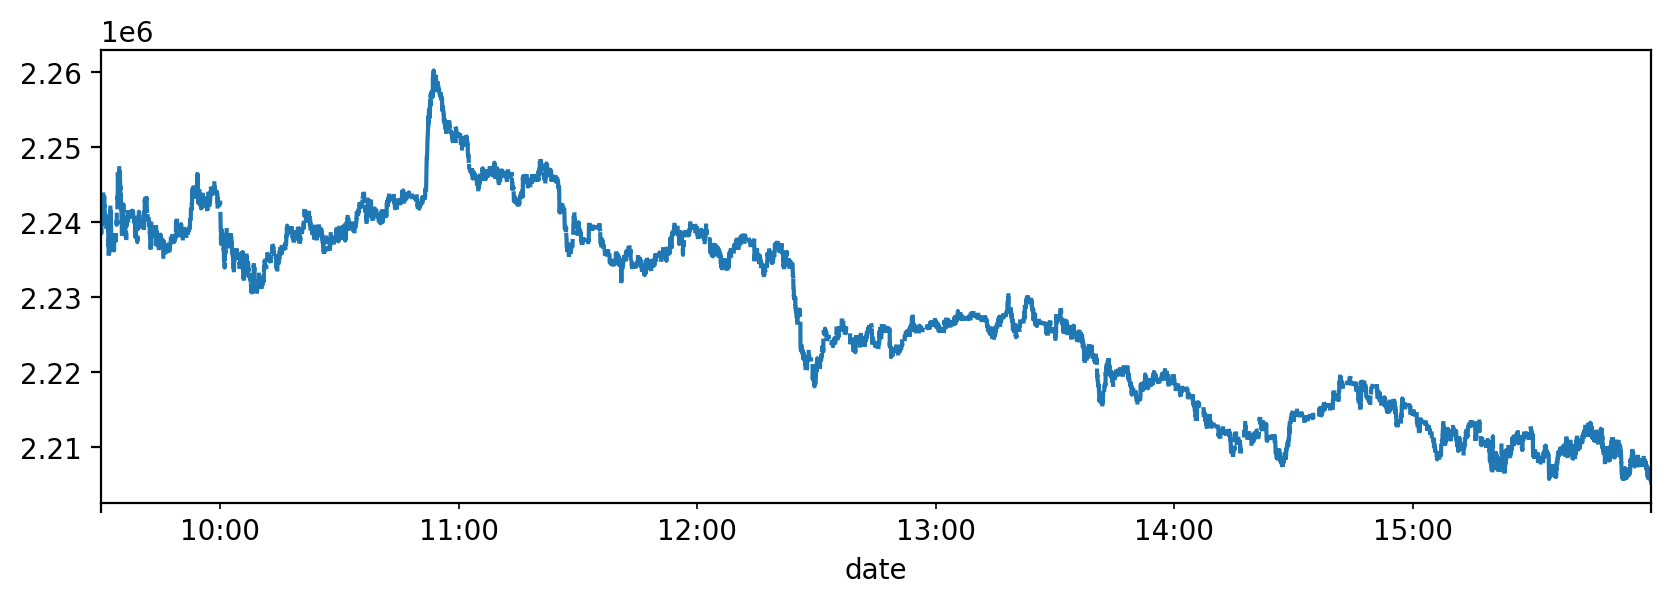

In [21]:
# Plot mid-price
from matplotlib import pyplot as plt

out_df["mid_price"].plot()
plt.show()


## Price chart
The mid-price is not exactly the chart price that you see on yahoo, google finance and so on.
<br> Assume that a stock is usually traded at $20\$$, and for some strange reasons one day it has zero trades, only one bid and one ask.
<br> One bid at $1000$ and one ask at $10$, you can say that the price is $505$? False.

You have to use the **actual trades** messages.


                         price
date                          
2012-06-21 09:30:00  2238200.0
2012-06-21 09:30:01  2238600.0
2012-06-21 09:30:02  2238800.0
2012-06-21 09:30:03        NaN
2012-06-21 09:30:04  2239200.0
...                        ...
2012-06-21 15:59:55  2205300.0
2012-06-21 15:59:56  2206200.0
2012-06-21 15:59:57  2206200.0
2012-06-21 15:59:58  2206300.0
2012-06-21 15:59:59  2205300.0

[23400 rows x 1 columns]


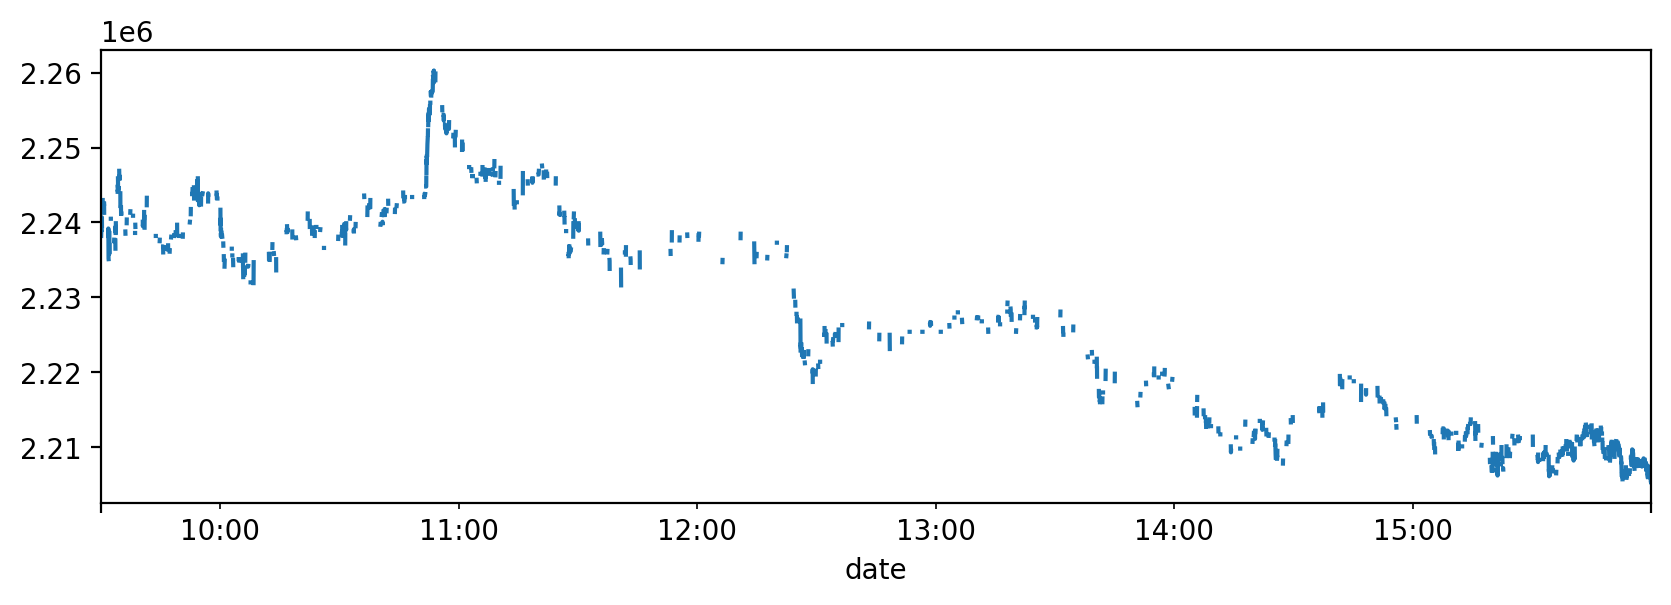

In [22]:
# Compute the actual price along the day

# use only executed orders::
#OrderEvent.EXECUTION,
#OrderEvent.HIDDEN_EXECUTION
df_m_executed = lob_data_w_date[(lob_data_w_date["event_type"].isin([4,5]))]
df_m_executed.index = df_m_executed["date"]
out_df_price = df_m_executed[["price"]].resample("1s").first()

print(out_df_price)
out_df_price["price"].plot()
plt.show()


                                                 date          time  \
date                                                                  
2012-06-21 09:59:20.882480 2012-06-21 09:59:20.882480  35960.882480   
2012-06-21 09:59:20.883326 2012-06-21 09:59:20.883326  35960.883326   
2012-06-21 09:59:25.602614 2012-06-21 09:59:25.602614  35965.602614   
2012-06-21 09:59:27.300591 2012-06-21 09:59:27.300591  35967.300591   
2012-06-21 09:59:27.303374 2012-06-21 09:59:27.303374  35967.303374   
...                                               ...           ...   
2012-06-21 15:59:59.545828 2012-06-21 15:59:59.545828  57599.545828   
2012-06-21 15:59:59.545828 2012-06-21 15:59:59.545828  57599.545828   
2012-06-21 15:59:59.903989 2012-06-21 15:59:59.903989  57599.903989   
2012-06-21 15:59:59.958245 2012-06-21 15:59:59.958245  57599.958245   
2012-06-21 15:59:59.959360 2012-06-21 15:59:59.959360  57599.959360   

                            event_type   order_id  size    price  direction 

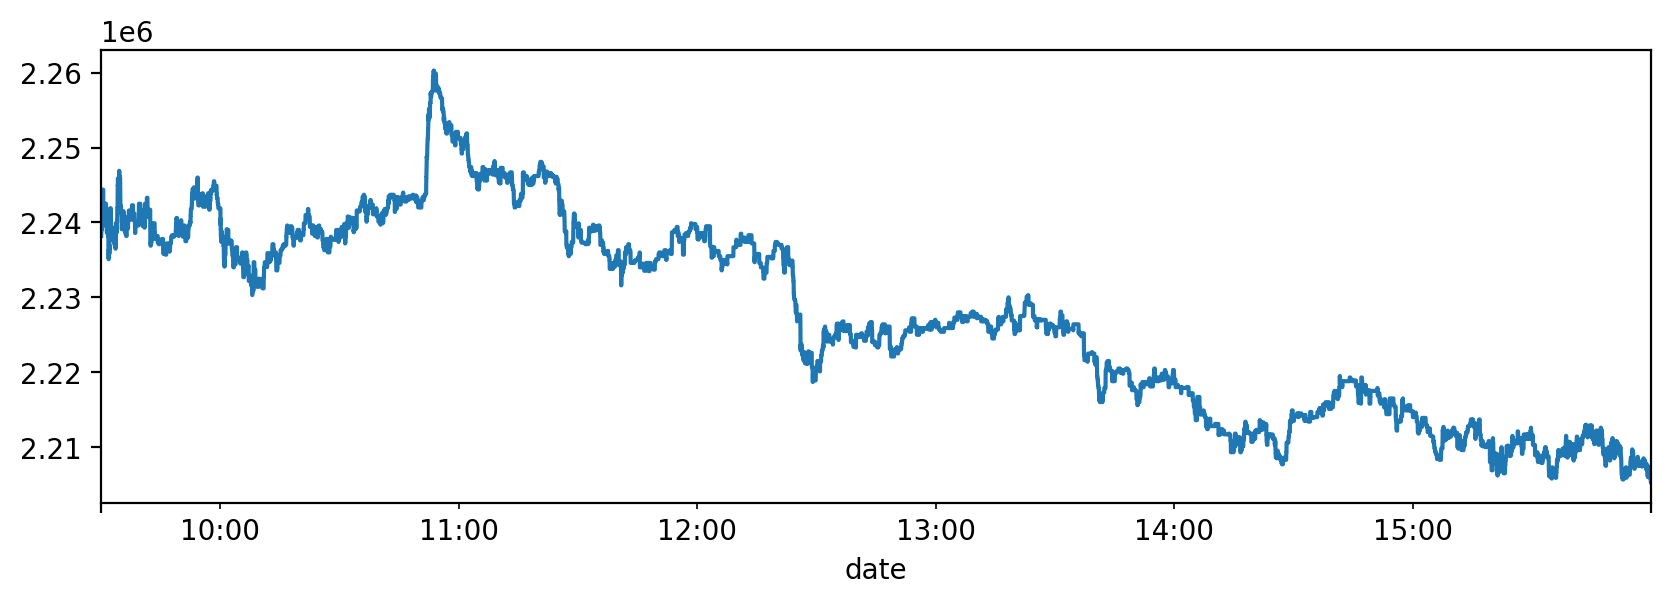

In [23]:
print(lob_data_w_date[5000:])

# fill empty holes
out_df_price["price"] = out_df_price["price"].fillna(method="ffill")
out_df_price["price"].plot()
plt.show()
